# NMR Factor analysis
Replication of 
*Jain, V., Minh, C. C., Heaton, N., Ferraris, P., Ortenzi, L., & Ribeiro, M. T. (2013, January 1). Characterization of Underlying Pore and Fluid Structure Using Factor Analysis on NMR Data. Society of Petrophysicists and Well-Log Analysts.*
## Loading and viewing the data

In [1]:
import lasio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = lasio.read("C:\\Users\\sayea5\\PycharmProjects\\NMR\\input_files\\R-540_CMR.las").df().dropna()
df.describe()

LAS spec version is 3.0 -- neither 1.2 nor 2


,T2DIST_DI_CMR[0],T2DIST_DI_CMR[1],T2DIST_DI_CMR[2],T2DIST_DI_CMR[3],T2DIST_DI_CMR[4],T2DIST_DI_CMR[5],T2DIST_DI_CMR[6],T2DIST_DI_CMR[7],T2DIST_DI_CMR[8],T2DIST_DI_CMR[9],...,T2DIST_DI_CMR[55],T2DIST_DI_CMR[56],T2DIST_DI_CMR[57],T2DIST_DI_CMR[58],T2DIST_DI_CMR[59],T2DIST_DI_CMR[60],T2DIST_DI_CMR[61],T2DIST_DI_CMR[62],T2DIST_DI_CMR[63],TCMR
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,...,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,0.000863,0.000920,0.000941,0.000932,0.000894,0.000852,0.000821,0.000825,0.000840,0.000847,...,0.001549,0.001391,0.001270,0.001190,0.001143,0.001109,0.001100,0.001173,0.001480,0.129903
std,0.001684,0.001829,0.001910,0.001930,0.001911,0.001874,0.001861,0.001882,0.001931,0.001966,...,0.002728,0.002497,0.002310,0.002157,0.002042,0.001963,0.001920,0.002003,0.003500,0.088129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002271
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076966
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000136,0.000157,0.116345
75%,0.001083,0.001186,0.001265,0.001226,0.001181,0.001111,0.000993,0.001051,0.001115,0.001080,...,0.001743,0.001489,0.001355,0.001303,0.001305,0.001320,0.001363,0.001490,0.001775,0.169860
max,0.012909,0.014342,0.015693,0.016455,0.016569,0.016245,0.016757,0.017733,0.018616,0.019078,...,0.012975,0.011932,0.012398,0.012861,0.013059,0.012948,0.012518,0.011795,0.054735,0.911685


In [3]:
df = df.loc[2280:2415]  # Limit to the reservoir interval

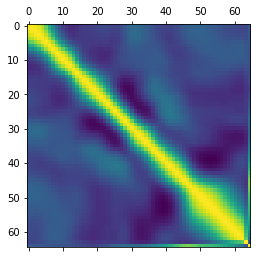

In [4]:
plt.matshow(df.corr());

## Principal Component Analysis

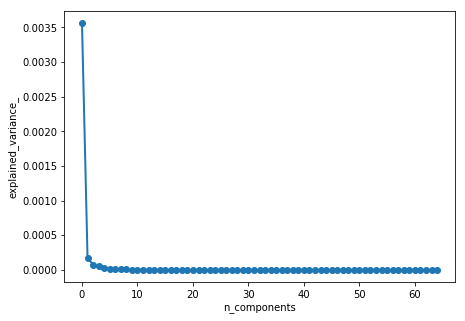

In [5]:
from sklearn import decomposition

pca = decomposition.PCA()
pca.fit(df)

plt.figure(1, figsize=(7, 5))
plt.plot(pca.explained_variance_, linewidth=2, marker='o')
plt.xlabel('n_components')
plt.ylabel('explained_variance_');

## Factor Analysis

In [6]:
fa = decomposition.FactorAnalysis(n_components=8)  # n=8 as per paper
fa.fit(df)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=8,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [7]:
factors = np.transpose(fa.components_)
factors = factors[:-1]  # Drop the last values

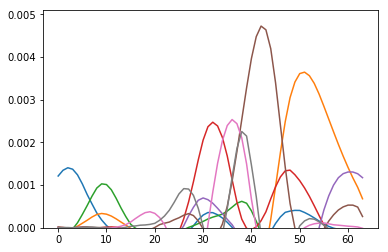

In [8]:
plt.plot(factors)
plt.ylim(ymin=0);

In [9]:
weights = factors.max(axis=0)

In [10]:
weights

array([ 0.00140646,  0.00364563,  0.0010294 ,  0.00247318,  0.0013074 ,
        0.00472448,  0.00253583,  0.00225518])

In [11]:
factors_norm = factors/weights

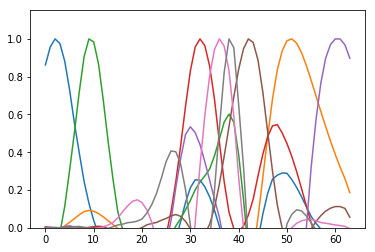

In [12]:
plt.plot(factors_norm)
plt.ylim(ymin=0);

Note that only the peaks are shown here. Some lines are mostly negative.

## Gaussian fitting

In [13]:
data = factors[:,5]  # Take the 5th factor
#data[data < 0] = 0
data

array([  2.05532618e-05,   7.39201284e-06,  -1.29379774e-06,
         1.83583831e-06,   9.07032287e-06,   1.87287962e-05,
         2.00544743e-05,   1.03229968e-05,   6.10560287e-06,
         5.79903386e-06,   9.31335450e-06,   5.56848364e-06,
        -1.34265610e-05,  -3.47577376e-05,  -5.78870849e-05,
        -7.23558918e-05,  -7.01896008e-05,  -7.36109830e-05,
        -6.81106435e-05,  -4.70144512e-05,   7.21851435e-06,
         7.40384274e-05,   1.07535418e-04,   1.34142629e-04,
         1.88464062e-04,   2.34186160e-04,   2.95490131e-04,
         3.32126437e-04,   2.86221386e-04,   1.61636921e-04,
        -2.37764353e-05,  -1.96252273e-04,  -2.37545854e-04,
        -1.50879287e-04,   8.99238288e-05,   5.05015072e-04,
         1.09026068e-03,   1.78700018e-03,   2.53185071e-03,
         3.27806600e-03,   3.96468486e-03,   4.47694686e-03,
         4.72448360e-03,   4.63759061e-03,   4.19605790e-03,
         3.39572573e-03,   2.40270734e-03,   1.41942746e-03,
         5.69986247e-04,

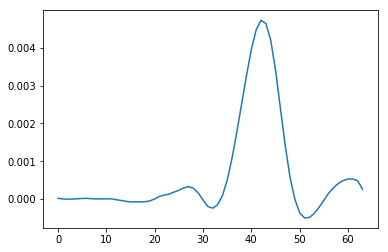

In [14]:
plt.plot(data)

In [16]:
from scipy import stats
from scipy.optimize import minimize

In [17]:
def fit_gaussian(factor):
    def gaussian_error(params, data):
        x = np.arange(0, 64)
        predicted = stats.norm.pdf(x, params[0], params[1]) * params[2]
        return np.sum((data - predicted)**2)
    return minimize(gaussian_error, x0=(np.argmax(factor), 2, 0.5), args=factor).x

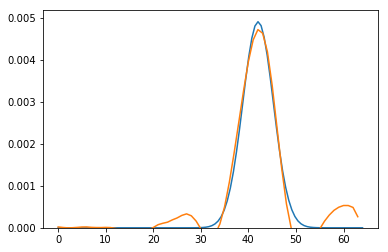

In [18]:
params = fit_gaussian(data)

x = np.linspace(0, 64, 100)
plt.plot(x, stats.norm.pdf(x, params[0], params[1])*params[2])
plt.plot(data)
plt.ylim(ymin=0);